#  Universidade Estadual do Cear - UECE 
## Programa de Pós-graduação em Ciência da Computação
## Fundamentos de Análise de Dados - 2021-1

# Classificação de imagens 
   ###  Domingos Bruno Sousa Santos
 * Apresentação parcial 
 * Projeções Ortogonais
 
### *Sign Language MNIST* - Reconhecimento de linguagem americana de sinais:
* 27455 (79.3%) imagens de treinamento;
* 7172 (20.7%) imagens de teste;
* imagens com 28 × 28 pixels;
* 24 letras (excluídos o J e o Z) (classes).

<img src="img_sing.png" width="820" height="505">

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
plt.style.use('seaborn')

In [2]:
# Leitura dos dados .CSV
df_train = pd.read_csv("sign_mnist_train/sign_mnist_train.csv")
df_test = pd.read_csv("sign_mnist_test/sign_mnist_test.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


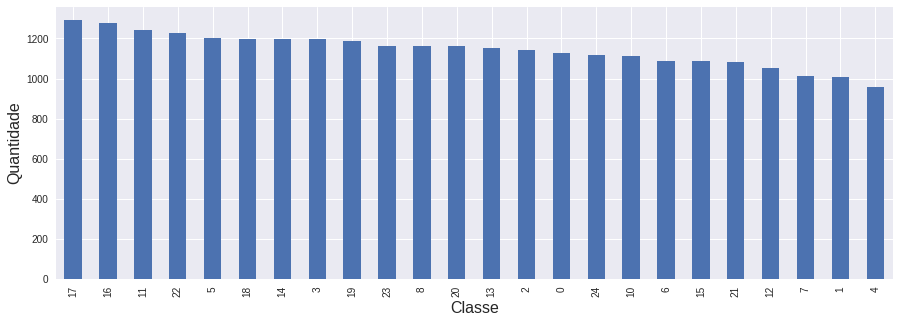

In [3]:
df_train['label'].value_counts().plot(kind='bar', figsize=(15,5))
plt.xlabel("Classe", size = 16,)
plt.ylabel("Quantidade", size = 16)
plt.savefig("train.png", bbox_inches='tight')

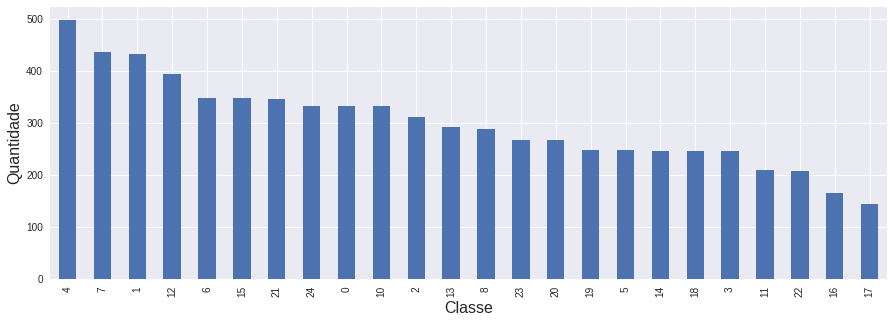

In [4]:
df_test['label'].value_counts().plot(kind='bar', figsize=(15,5))
plt.xlabel("Classe", size = 16,)
plt.ylabel("Quantidade", size = 16)
plt.savefig("test.png", bbox_inches='tight')

In [3]:
# Pegando as classes das imagens de treino e teste
train_label = df_train["label"].values
test_label = df_test["label"].values

# Removendo a coluna das classes do data frame
del df_train["label"]
del df_test["label"]

# Juntando os dados de teste de treinamneto
# Normalizado os valores de pixels para ficar em uma escla entre 0 e 1
X_data = np.concatenate((df_train.values/255, df_test.values/255), axis=0)
Y_data = np.concatenate((train_label, test_label), axis=0)

In [102]:
# 28x28
print(X_data.shape)
np.unique(Y_data)

(34627, 784)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

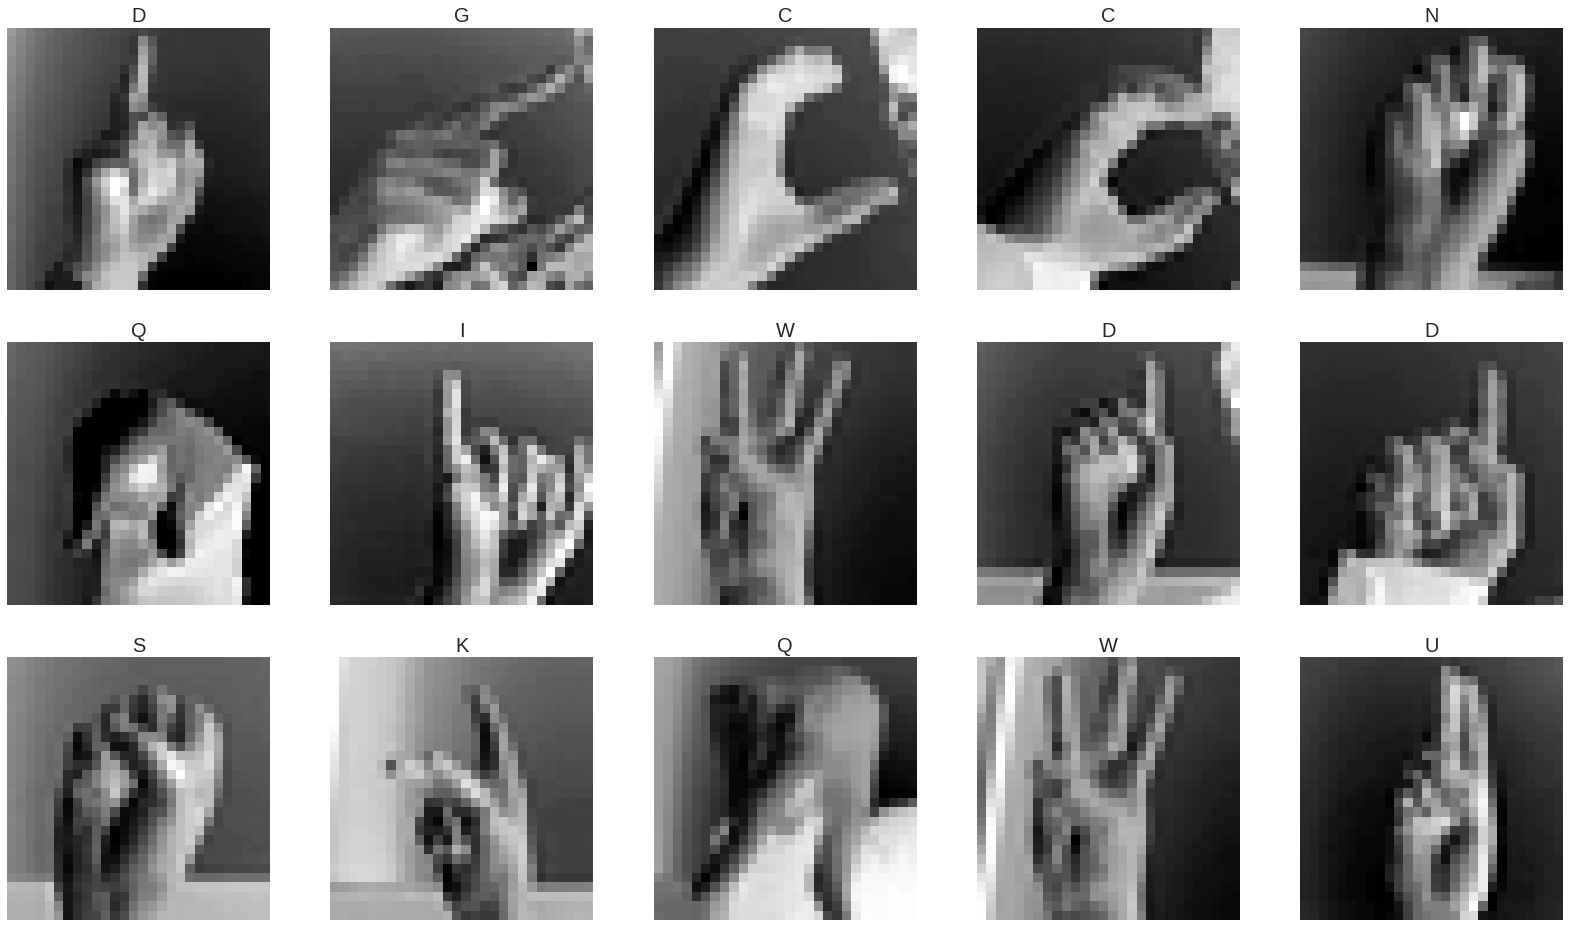

In [7]:
# Platar algumas imagens do dataset
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 
               'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
plt.figure(figsize=(28,28))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = X_data[i].reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.binary)
    label_index = int(Y_data[i])
    plt.title(class_names[label_index], fontsize=20)
plt.show()

# Tarefas

## 1. Centralizar a matriz de dados original $\tilde{X}$ obtendo a matriz $X$.
Centralizar a matriz de dados original obtendo a matriz X.
A centralização de dados caracteriza-se pela subtração dos dados amostrais de cada variável, da sua média amostral.
\begin{equation}
X = \tilde{X} - \mu 
\end{equation}

In [4]:
# Centralizando a matriz de dados
mean_x = np.mean(X_data, axis=0)
X_central = X_data - mean_x
print(X_central.shape)
print(mean_x.shape)
print(X_data.shape)

(34627, 784)
(784,)
(34627, 784)


## 2. Dividir o banco de dados em conjunto de treinamento e conjunto de teste (proporções comumente utilizadas são 60%/40% e 70%/30%.)



In [5]:
# Dividindo os dados com o X normal 70%/30%
X_train, X_test, Y_train, Y_test = train_test_split (X_data, Y_data, 
                                                                     test_size=0.3, 
                                                                     random_state = 0)
# Dividindo os dados com o X centralizado 70%/30%
X_train_cent, X_test_cent, Y_train_cent, Y_test_cent = train_test_split (X_central, Y_data, 
                                                                     test_size=0.3, 
                                                                     random_state = 0)

In [10]:
print(X_train.shape)
print(X_test_cent.shape)

(24238, 784)
(10389, 784)


In [11]:
X_train[0][:30]

array([0.8627451 , 0.87058824, 0.87843137, 0.87843137, 0.88235294,
       0.88627451, 0.89019608, 0.89411765, 0.89411765, 0.89411765,
       0.89019608, 0.89411765, 0.89803922, 0.89803922, 0.89411765,
       0.89803922, 0.89803922, 0.89411765, 0.89411765, 0.89411765,
       0.89019608, 0.89411765, 0.89019608, 0.88235294, 0.8745098 ,
       0.87058824, 0.86666667, 0.8627451 , 0.86666667, 0.8745098 ])

In [12]:
X_train_cent[0][:30]

array([0.29075656, 0.28665402, 0.28361638, 0.27456869, 0.2681702 ,
       0.26312109, 0.25942286, 0.2564278 , 0.24982987, 0.24352208,
       0.2349154 , 0.23463148, 0.2357854 , 0.23271651, 0.22603103,
       0.2278716 , 0.22668789, 0.22226224, 0.22244956, 0.22360427,
       0.22138216, 0.22749787, 0.22729798, 0.22400394, 0.22073606,
       0.22553737, 0.22822404, 0.22622152, 0.28787193, 0.28356677])


## 3. Calcular a matriz de covariância dos dados treinamento de duas maneiras:
   
* 1) Utilizado base de treinamento original $\tilde{X}$ (não centralizada):
\begin{align} np.cov(\tilde{X}) \end{align}
* 2) Utilizando base de treinamento centralizada $X$:
\begin{equation}
 \frac{1}{m-1}X^TX
\end{equation}

Comparar os resultados. Atenção: verique se o parâmetro $rowvar$ na
função np.cov() deve ser $True$ ou $False$.

In [6]:
# Calculando a matriz de covariância com a primeira forma com X Não cetralizado
cov_mat_X_normal = np.cov(X_train, rowvar=False)
print(cov_mat_X_normal.shape)
cov_mat_X_normal

(784, 784)


array([[0.02704871, 0.02557657, 0.02457706, ..., 0.00879484, 0.00761094,
        0.0072442 ],
       [0.02557657, 0.02504146, 0.0240026 , ..., 0.00864483, 0.00755489,
        0.00712012],
       [0.02457706, 0.0240026 , 0.02384798, ..., 0.00808037, 0.00702938,
        0.00673356],
       ...,
       [0.00879484, 0.00864483, 0.00808037, ..., 0.06356987, 0.06164137,
        0.05902013],
       [0.00761094, 0.00755489, 0.00702938, ..., 0.06164137, 0.06459318,
        0.06303164],
       [0.0072442 , 0.00712012, 0.00673356, ..., 0.05902013, 0.06303164,
        0.06628983]])

In [7]:
m = X_train_cent.shape[0] # Pegando o numero de linhas
# Aplicando a formula do método da segunda forma
cov_mat_X_cent = (1/(m-1)) * np.dot(X_train_cent.T, X_train_cent)
print(cov_mat_X_cent.shape)
cov_mat_X_cent 

(784, 784)


array([[0.02704894, 0.02557665, 0.02457718, ..., 0.00879526, 0.00761134,
        0.0072448 ],
       [0.02557665, 0.02504149, 0.02400264, ..., 0.00864498, 0.00755503,
        0.00712033],
       [0.02457718, 0.02400264, 0.02384804, ..., 0.00808059, 0.00702958,
        0.00673387],
       ...,
       [0.00879526, 0.00864498, 0.00808059, ..., 0.06357065, 0.06164211,
        0.05902124],
       [0.00761134, 0.00755503, 0.00702958, ..., 0.06164211, 0.06459388,
        0.06303269],
       [0.0072448 , 0.00712033, 0.00673387, ..., 0.05902124, 0.06303269,
        0.0662914 ]])

In [15]:
# Comprando a igualdade das matrizes
max_mat = np.max(cov_mat_X_cent - cov_mat_X_normal) 
min_mat = np.min(cov_mat_X_cent - cov_mat_X_normal)
max(abs(max_mat), abs(min_mat))
# 3.909882707660295e-06 = 0.0002799097

3.909882707660295e-06

## 4. Calcular a decomposição espectral da matriz de covariância dos dados de treinamento, isto é, $cov(X) = QΛQ^T$, usando a função do NumPy:

\begin{equation}
 cov(X) = QΛQ^T
\end{equation}

\begin{equation}
 w, Q =  np.linalg.eigh(cov(X))
\end{equation}

* $w$ trata-se dos autovalores
* $Q$ trata-se dos autovetores

obtendo-se os autovalores w e seus autovetores associados nas colunas de Q.
Atenção: os autovalores (e seus autovetores associados) devem ser ordenados em ordem decrescente.

In [16]:
# Calcular a decomposição espectral 
w, Q = np.linalg.eigh(cov_mat_X_cent)
print(w.shape)
print(Q.shape)
print(w[:30])
Q[:30]

(784,)
(784, 784)
[2.26762905e-06 2.60800257e-06 2.67941803e-06 2.91124910e-06
 3.27730955e-06 3.52856619e-06 3.79256902e-06 4.23316033e-06
 4.57177599e-06 4.77775479e-06 4.94827804e-06 5.27611370e-06
 5.52062025e-06 6.01556362e-06 6.63998353e-06 6.91661706e-06
 7.27692151e-06 7.41515001e-06 7.75411000e-06 8.11249490e-06
 8.96580177e-06 9.30239739e-06 9.72752650e-06 9.96136918e-06
 1.02763521e-05 1.05660401e-05 1.12221079e-05 1.16033213e-05
 1.18633261e-05 1.29081198e-05]


array([[-1.74662601e-01,  2.04804773e-01, -2.27620336e-02, ...,
        -5.69028347e-02,  1.97453913e-03, -4.32044638e-02],
       [ 3.20195782e-01,  9.22117074e-03,  1.44834095e-01, ...,
        -5.34868140e-02,  8.34214086e-04, -4.27970684e-02],
       [-2.13304970e-01, -1.50004617e-01,  1.05105149e-01, ...,
        -5.19355120e-02, -1.47820811e-03, -4.28215949e-02],
       ...,
       [ 6.78827465e-04, -1.40936456e-04, -2.20604968e-03, ...,
         2.01134618e-02, -1.42838549e-02, -1.86363450e-02],
       [ 3.01351803e-01, -3.68300668e-01,  3.30424365e-02, ...,
        -5.75666290e-02,  1.86253130e-03, -4.35284625e-02],
       [-5.02723713e-01,  4.03352363e-02, -3.11224325e-01, ...,
        -5.40421878e-02,  6.39648536e-04, -4.30531663e-02]])

In [17]:
# Ordenando os autovalores de forma decrescentes
index = np.argsort(w)[::-1] #Obter índices para ordenação decrescente dos autovalores
w_ord = w[index]
w_ord[:30]

array([8.2597704 , 2.57198197, 2.02701259, 1.3746375 , 0.85862011,
       0.82425566, 0.73144211, 0.60323111, 0.5805728 , 0.46649509,
       0.42368698, 0.38196303, 0.33071951, 0.31462535, 0.25658531,
       0.23349789, 0.19892987, 0.19286835, 0.17489357, 0.1618687 ,
       0.15046564, 0.14110168, 0.12842561, 0.12275958, 0.12020107,
       0.10978806, 0.10484883, 0.09675963, 0.09140576, 0.09088906])

In [19]:
# Ordenando os autovetores de forma decrescentes
Q_ord = Q[index]
Q_ord[:30]

array([[-0.00016559, -0.00222029, -0.00078143, ...,  0.0385044 ,
         0.09539855, -0.03032871],
       [-0.0015359 ,  0.00445228,  0.00325329, ...,  0.03659848,
         0.09762979, -0.03131344],
       [ 0.00112941, -0.00251503, -0.00231183, ...,  0.03306994,
         0.10070846, -0.03287309],
       ...,
       [ 0.00063638,  0.00251691,  0.00024351, ..., -0.03274027,
         0.02149068, -0.03616029],
       [ 0.00185151, -0.00121611, -0.00234958, ...,  0.0366169 ,
         0.09877244, -0.03294105],
       [-0.00120563, -0.00367927,  0.00049745, ...,  0.03395088,
         0.10131545, -0.03445634]])

# Questões

### 1. Demonstrar que uma matriz $Q$ é ortogonal (isto é, quadrada com colunas ortonormais) se, e somente se, $Q^TQ = I$
* **Solução**:  Por definição,  uma matriz $Q$ quadrada ($n x n$) é ortogonal se, e somente se, $Q^{-1}$ = $Q^T$. Com isso $Q$ é ortogonal e suas colunas são ortonormais, dessa forma as colunas de $Q^T$ também  são ortogonais. Seja $X$ a matriz formada pelo produto $Q^TQ$. Dessa forma, os elementos $(i, j)$ de $X$ são obtidos pelo produto interno da linha $q_i$ de $Q^T$ pela coluna $q_j$ de $Q$. Como $q_i$ e $q_j$ são ortonormais, tem-se que: 

   \begin{equation}
    (q_i, q_j) = \left \{
    \begin{array}{cc}
    0  & i \neq j\\
    1  & i = j\\
    \end{array}
    \right.
    \end{equation}
    
    Com isso, a matriz $X$ é uma identidade, por exemplo:
    
    \begin{equation}
    Q^TQ = \left [
    \begin{array}{cc}
    1  & 0  \ \ 0  \ \ 0 \\
    0  & 1 \ \ 0 \ \ 0 \\
    0  & 0 \ \ 1 \ \ 0 \\
    0  & 0 \ \ 0 \ \ 1 \\
    \end{array}
    \right ]
    \end{equation}

### 2. Verificar, com o respectivo banco de dados, que $Q^TQ \approx I$.

In [20]:
# Calculando Q trasposto com os autovetores ordenados
Q = np.array(Q_ord)
Q_T = Q.T
# Fazendo o produdo de Q por Q transposto
Q_I = np.dot(Q,Q_T)
Q_I[:30]

array([[ 1.00000000e+00, -1.66533454e-16, -2.77555756e-17, ...,
         9.36750677e-17,  6.24500451e-17,  4.51028104e-17],
       [-1.66533454e-16,  1.00000000e+00,  2.77555756e-17, ...,
         5.32343267e-17, -5.46437895e-17,  7.97972799e-17],
       [-2.77555756e-17,  2.77555756e-17,  1.00000000e+00, ...,
        -8.71698547e-17, -1.73472348e-16, -4.42354486e-17],
       ...,
       [ 2.60208521e-17, -1.19695920e-16, -4.87890978e-18, ...,
         8.67361738e-19, -9.49761103e-17,  1.24466409e-16],
       [-3.33066907e-16, -2.77555756e-17,  2.77555756e-17, ...,
        -9.54097912e-18,  1.82579646e-16,  8.34835673e-17],
       [ 8.32667268e-17, -1.24900090e-16, -1.52655666e-16, ...,
         2.15485182e-18, -5.08490819e-17,  3.91939085e-17]])

In [21]:
# Fazendo a matriz identidade do resultado do produto anterior
I = np.identity(Q_I.shape[0])
I[:30]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
# Comparando as matrizes
max_mat = np.max(I - Q_I) 
min_mat = np.min(I - Q_I)
max(abs(max_mat), abs(min_mat))
# 0.0001807368

1.7763568394002505e-15

### 3. Consideremos $Z$ a matriz $m × n$ em cujas linhas estão as coordenadasdas amostras em relação à base de autovetores, isto é:

\begin{equation}
 X^T = QZ^T
\end{equation}

e $\tilde{Q}$ a matriz $n × r$, cujas colunas são a r primeiras colunas de $Q$.
Mostrar que a matriz cujas linhas são as coordenadas das amostras em
relação à **base de autovetores** do subespaço gerado pelos $r$ primeiros
autovetores (associados aos $r$ maiores autovalores) é dada por:

\begin{equation}
 \hat{Z} = X\hat{Q}
\end{equation}

\begin{equation}
   X^T = Q Z^T\\
   Q^T X^T = Q^T Q Z^T\\
   Q^T X^T = I Z^T\\
   (Z^T)^T = (Q^T X^T)^T\\
   Z = (X^T)^T(Q^T)^T\\
   Z = X Q\\
\end{equation}

### 4.  Seguindo a Equação (9), a matriz dos dados projetados é definida por:
\begin{equation}
 \hat{X}^T = X\hat{Q}\hat{Z}^T
\end{equation}
Mostrar que os dados projetados são calculados pela equação:
\begin{equation}
 \hat{X} = X\hat{Q}\hat{Q}^T
\end{equation}

\begin{equation}
   \hat{X}^T = \hat{Q}\hat{Z}^t\\
   (\hat{X}^T)^T = (\hat{Q}\hat{Z}^t)^T\\
   \hat{X} = \hat{Z}\hat{Q}^T\\
   \hat{X} = X\hat{Q}\hat{Q}^T
\end{equation}

### 5. Calcular, com o respectivo banco de dados, as matrizes $\hat{Z}$  e $\hat{X}$; verificar que a matriz de projeção

\begin{equation}
 \hat{Q}\hat{Q}^T
\end{equation}

**não** é a matriz identidade.

In [26]:
# Calculando Z^ com os 80 primeiros outovetores 
# Z^ = X^Q^

Q_c = Q[:,0:79] # pegando as 80 primeiras colunas

#print(Q_c.shape)
#print(Q_c)

# Calculando o X^ dados projetados
#X^= XQ^Q^T
X_c = np.dot(X_train_cent, Q_c)
X_c = np.dot(X_c, Q_c.T)

print(X_c.shape)
print(X_c)

(24238, 784)
[[ 3.44930012e-04 -1.81195798e-03  2.58563857e-03 ... -1.07664790e-02
  -7.92771216e-03  7.98274228e-03]
 [-2.80783828e-03  8.63025624e-03 -1.02820757e-02 ... -2.62431022e-02
  -1.19498417e-02 -7.01762983e-03]
 [ 2.32546397e-03 -6.78320087e-04  9.37748946e-04 ...  5.19598407e-03
  -8.83209086e-03  8.30519193e-04]
 ...
 [-1.25157441e-04 -1.55147541e-03  3.19741929e-03 ... -1.11403084e-03
   1.77970208e-02 -2.65296431e-03]
 [-5.40074599e-04  3.76339365e-06 -1.44447484e-03 ...  8.62456425e-03
   1.34781096e-02  1.74068331e-02]
 [-4.65898362e-04  1.23449403e-03 -3.35519901e-03 ... -8.26542838e-03
  -3.54637405e-03  5.67557658e-03]]


In [44]:
#verificando se Q^QT não é matriz transposta de Q^
result_QQ = np.dot(Q_c, Q_c.T)
print(result_QQ.shape)
print(result_QQ)
# Comparando as matrizes
#Criando a matriz indetide da projecao
mat_I_proj = np.identity(result_QQ.shape[0])
# Comprando a igualdade das matrizes
max_mat = np.max(result_QQ -  mat_I_proj) 
min_mat = np.min(result_QQ - mat_I_proj)
max(abs(max_mat), abs(min_mat))

(784, 784)
[[ 0.00258015 -0.00271496  0.00170002 ... -0.00102284 -0.00406378
   0.00069513]
 [-0.00271496  0.00548853 -0.0046731  ... -0.00201194  0.00353511
  -0.00706639]
 [ 0.00170002 -0.0046731   0.00752588 ...  0.00432006 -0.00423809
   0.00920497]
 ...
 [-0.00102284 -0.00201194  0.00432006 ...  0.66115171 -0.0807986
  -0.03124017]
 [-0.00406378  0.00353511 -0.00423809 ... -0.0807986   0.60714332
  -0.00687942]
 [ 0.00069513 -0.00706639  0.00920497 ... -0.03124017 -0.00687942
   0.44637163]]


0.9987253675957461

# Trabalho Final classificação com SVD
A Decomposição de Valor Singular (SVD), como visto, encontra os autovetores e (a raiz quadrada dos) autovalores da matriz de covariância dos dados $X^T X$, sem calculá-la explicitamente. Assim, a redução de dimensionalidade para o problema de classicação pode ser realizada utilizando

\begin{equation}
 X = USV^T
\end{equation}

## Tarefas

* 1) Dividir o banco de dados em conjunto de treinamento e conjunto deteste (proporções comumente utilizadas são 60%/40% e 70%/30%.)

* 2) Calcular, para o respectivo banco de dados, a SVD da matriz de dados de treinamento centralizados $X$. Gerar um gráco de número de valores singulares versus variabilidade acumulada.

In [8]:
# Calculate SVD com os dados de treinamneto
U, S, Vt = np.linalg.svd(X_train_cent, full_matrices=False)
print('U: ', U.shape, 
      '\nS: ', S.shape, 
      '\nVt: ', Vt.shape)

U:  (24238, 784) 
S:  (784,) 
Vt:  (784, 784)


### Culando a Variabilida acumulada e um gráco de número de valores singulares versus variabilidade acumulada.
\begin{equation}
 E = \frac{\lambda_1 + \lambda_2 + ... + \lambda_r }{\lambda_1 + \lambda_2 + ... + \lambda_n}
\end{equation}

In [9]:
# Caculando a Variabilida acumulada
varia_acum = np.cumsum(S**2) / np.sum(S**2)


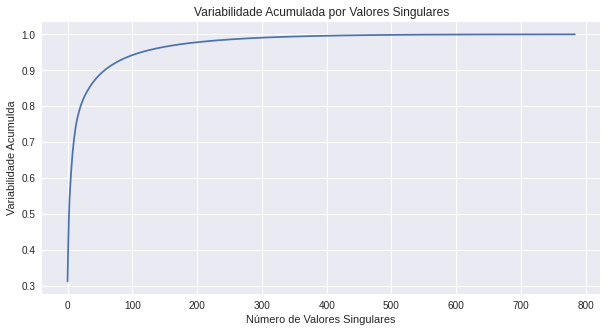

In [10]:
# Gerando um gráco de número de valores singulares versus variabilidade acumulada.
y_plot = varia_acum
x_plot = np.array(range(len(S)))

plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot)
plt.title('Variabilidade Acumulada por Valores Singulares')
plt.xlabel("Número de Valores Singulares")
plt.ylabel("Variabilidade Acumulda")
plt.savefig("vari_x_singulares.png", bbox_inches='tight')
plt.show()

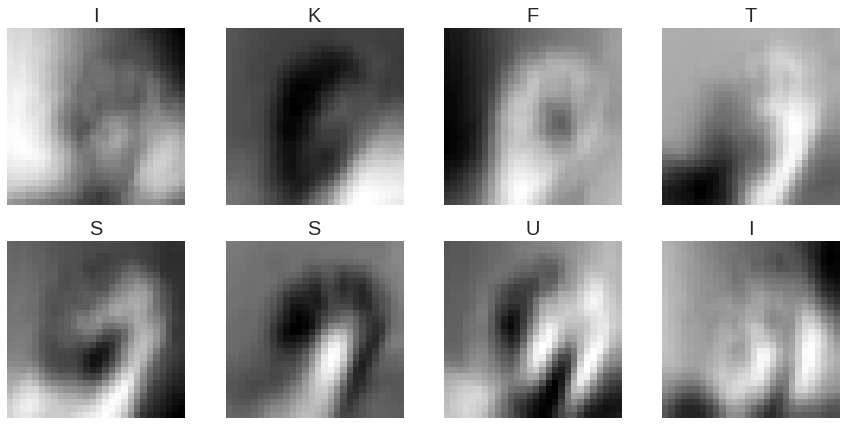

In [11]:
# Platar algumas imagens do dataset
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 
               'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = np.reshape(Vt[i], (28, 28))
    plt.imshow(img, cmap=plt.cm.binary)
    label_index = int(Y_train_cent[i])
    plt.title(class_names[label_index], fontsize=20)
plt.show()

### 3) Selecionar valores apropriados de variabilidade acumulada para reduzir a dimensionalidade do problema de classicação, resolvendo-o para o respectivo banco de dados.
 * Realizando a redução de dimensionalidade

In [12]:
n_vari_acum = 0.95 # Variabilidade acumulada esperada
r_melhores = [ n for n, i in enumerate(varia_acum) if i > n_vari_acum ][0]
print( 'Variabilidade acumulada: {:.2f}%, até o {:d}-ésimo autovalor.'.format(100 * varia_acum[r_melhores], r_melhores))

Variabilidade acumulada: 95.05%, até o 114-ésimo autovalor.


In [13]:
varia_acum[:r_melhores]

array([0.3126805 , 0.41004503, 0.48677928, 0.53881733, 0.57132111,
       0.602524  , 0.63021335, 0.65304917, 0.67502724, 0.6926868 ,
       0.70872582, 0.72318535, 0.73570501, 0.74761542, 0.75732867,
       0.76616793, 0.77369858, 0.78099978, 0.78762052, 0.79374819,
       0.79944419, 0.80478572, 0.80964738, 0.81429454, 0.81884485,
       0.82300097, 0.82697011, 0.83063303, 0.83409327, 0.83753395,
       0.84081578, 0.84397931, 0.84704968, 0.85005966, 0.85289903,
       0.85561606, 0.85829465, 0.86093865, 0.86346162, 0.86590746,
       0.86834145, 0.87064886, 0.87292202, 0.87510145, 0.87719565,
       0.87921944, 0.88123087, 0.88319473, 0.88510604, 0.88695916,
       0.88873355, 0.89045792, 0.89215636, 0.89381287, 0.89543275,
       0.89699431, 0.89853597, 0.90003019, 0.9014886 , 0.90291553,
       0.90432193, 0.90566909, 0.90699546, 0.90827915, 0.90953922,
       0.91078286, 0.91200798, 0.91319186, 0.91436272, 0.91549832,
       0.91661486, 0.91770566, 0.9187884 , 0.91985657, 0.92091

In [14]:
# Redução de dimensionalidade com os r melhores autovalores (Componetes principais)
V_new  = Vt[:r_melhores,:].T 
X_train_new = np.dot( X_train_cent, V_new)
X_test_new  = np.dot( X_test_cent,  V_new )

print( 'Dimensões: \nX_train: {:} --> X_train_new:  {:}'\
      .format(X_train_cent.shape, X_train_new.shape) )
print( 'X_test:   {:} --> X_test_new:    {:}'\
      .format(X_test_cent.shape, X_test_new.shape) )   
print( 'V:       {:} --> V_hat: {:}'\
      .format(Vt.shape, V_new.shape) )

Dimensões: 
X_train: (24238, 784) --> X_train_new:  (24238, 114)
X_test:   (10389, 784) --> X_test_new:    (10389, 114)
V:       (784, 784) --> V_hat: (784, 114)


### Classificação com K-NN
* 4) Gerar um gráco de número de valores singulares versus acurácia. Isso deve ser feito de maneira apropriada, não devendo o gráco ser gerado em tempo superior a 24 horas.

In [120]:
# K-NN não otimizado
error_count = 0
error_ids = []
for i in tqdm(range(X_test.shape[0])):
    dist = []
    for k in range(X_train.shape[0]):
        dist = np.append(dist, np.linalg.norm(X_test_new[i,:] - X_train_new[k,:]))
    index = np.argmin(dist)
    if Y_train_cent[index]!= Y_test_cent[i]:
        error_count += 1
        error_ids.append(i+1)
print( 'Número de erros: {:d} (id# {:}). \nAcurácia: {:.2f}%.'.format(error_count, error_ids, 
                                                                      100 * (X_test.shape[0] - error_count) / X_test.shape[0]))

100%|██████████| 10389/10389 [57:44<00:00,  3.00it/s]

Número de erros: 9 (id# [3779, 6224, 6271, 6581, 6882, 8083, 8125, 8387, 9256]). 
Acurácia: 99.91%.


In [23]:
 # K-NN do sklearn
knn = KNeighborsClassifier(n_neighbors=1) # K = 1
knn.fit(X_train_new, Y_train_cent)
predict = knn.predict(X_test_new)
acc = accuracy_score(Y_test_cent, predict)

print('Variabilidade acumulada: ',n_vari_acum)
print('Autovalores: ', r_melhores)
print("K-NN K = 1")
print("Acuracia: ", acc)

Variabilidade acumulada:  0.95
Autovalores:  114
K-NN K = 1
Acuracia:  0.9991336991048224


In [18]:
def principalComponents(r_melhores, Vt):
    V_new  = Vt[:r_melhores,:].T 
    X_train_new = np.dot( X_train_cent, V_new)
    X_test_new  = np.dot( X_test_cent,  V_new )
    
    return X_train_new, X_test_new

In [15]:
list_acc = []

for r in tqdm(range(1, X_test.shape[1])):
    
    X_train, X_test = principalComponents(r, Vt)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, Y_train_cent)

    predict = knn.predict(X_test)
    list_acc.append(accuracy_score(Y_test_cent, predict))
    

100%|██████████| 783/783 [1:00:52<00:00,  4.66s/it]


In [19]:
#np.save('acc_knn.npy', list_acc)
list_acc = np.load("acc_knn.npy")

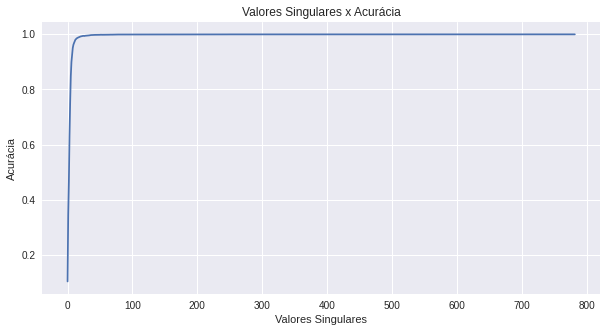

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(list_acc)
plt.title('Valores Singulares x Acurácia')
plt.xlabel('Valores Singulares')
plt.ylabel('Acurácia')
plt.savefig("vari_x_acc_01.png", bbox_inches='tight')
plt.show()

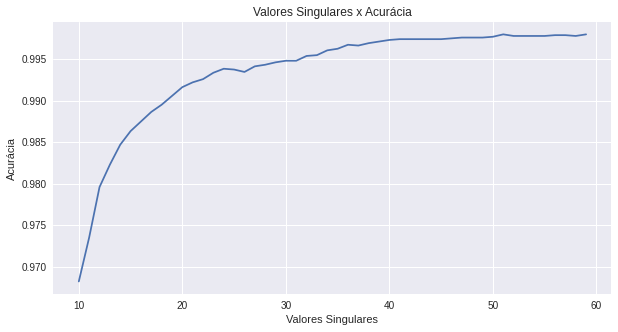

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(10,60)), list_acc[10:60])
plt.title('Valores Singulares x Acurácia')
plt.xlabel('Valores Singulares')
plt.ylabel('Acurácia')
plt.savefig("vari_x_acc_02.png", bbox_inches='tight')
plt.show()

# Questões

* 2) Vericar numericamente a proposição anterior, calculando, para o respectivo banco de dados, os autovalores de $X^T X$ e $XX^T$

In [76]:
# Obtendo a matriz XTX
𝑋T𝑋 = np.dot(X_train_cent[:1000,:].T, X_train_cent[:1000,:])

In [77]:
# Calculando a decomposição espectral autovalores(w) e autovetores(Q) de 𝑋𝑇X
W_1, Q_1 = np.linalg.eigh(𝑋T𝑋)

#Ordenando os autovalores e autovetores de forma decrescentes
index = np.argsort(W_1)[::-1]
W_1 = W_1[index]
Q_1 = Q_1[:,index]

print(W_1.shape)
print(Q_1.shape)
print(W_1[:50])
print(Q_1[:50])

(784,)
(784, 784)
[8279.27911971 2532.5412462  2043.28749337 1391.56258906  914.06512277
  821.77981627  732.43907506  575.95496869  573.51521805  481.30928489
  441.03716364  376.39935972  338.91183715  320.34969001  261.6914348
  232.381222    217.97633943  202.85531257  176.37828136  166.79934931
  156.5869614   146.98866353  137.40318606  133.5345821   123.10998228
  113.55234804  104.2845391   102.09178897   97.71430429   94.70305527
   92.65516141   87.22045011   84.14554543   80.23232211   78.33738876
   77.11272155   72.12360216   71.49742339   68.57621875   66.41606522
   65.4100306    64.01844042   61.13916986   59.30561165   56.59590694
   55.61979287   54.46799418   51.93522586   51.05068695   50.41680703]
[[-0.04185707  0.00191797 -0.05254429 ... -0.04573683 -0.00611522
   0.20155825]
 [-0.04210407  0.00176041 -0.04908005 ...  0.16955775 -0.08892301
  -0.0070943 ]
 [-0.04243646 -0.0004945  -0.04923303 ...  0.02652132  0.03068191
   0.0101891 ]
 ...
 [-0.02773736 -0.0088625

In [78]:
# Obtendo a matriz XXT
𝑋𝑋T = np.dot(X_train_cent[:1000,:], X_train_cent[:1000,:].T)

In [79]:
# Calculando a decomposição espectral autovalores(w) e autovetores(Q) de XX𝑇
W_2, Q_2 = np.linalg.eigh(𝑋𝑋T)

#Ordenando os autovalores autovetores de forma decrescentes
index = np.argsort(W_2)[::-1]
W_2 = W_2[index]
Q_2 = Q_2[:,index]

print(W_2.shape)
print(Q_2.shape)
print(W_2[:50])
print(Q_2[:50])

(1000,)
(1000, 1000)
[8279.27911971 2532.5412462  2043.28749337 1391.56258906  914.06512277
  821.77981627  732.43907506  575.95496869  573.51521805  481.30928489
  441.03716364  376.39935972  338.91183715  320.34969001  261.6914348
  232.381222    217.97633943  202.85531257  176.37828136  166.79934931
  156.5869614   146.98866353  137.40318606  133.5345821   123.10998228
  113.55234804  104.2845391   102.09178897   97.71430429   94.70305527
   92.65516141   87.22045011   84.14554543   80.23232211   78.33738876
   77.11272155   72.12360216   71.49742339   68.57621875   66.41606522
   65.4100306    64.01844042   61.13916986   59.30561165   56.59590694
   55.61979287   54.46799418   51.93522586   51.05068695   50.41680703]
[[ 0.05723131  0.09300016 -0.01517916 ...  0.          0.
   0.        ]
 [ 0.05697134  0.02068003 -0.03629045 ...  0.00081883 -0.03663881
  -0.15310978]
 [-0.00403013 -0.01885921  0.01304654 ...  0.04754221  0.23319617
  -0.13406291]
 ...
 [-0.01164885  0.0696586  -0.

In [118]:
def maxDiff(A,B):
    mx = np.max(A-B)
    mn = np.min(A-B)
    return max(abs(mn), abs(mx))

In [81]:
maxDiff(W_1[:700], W_2[:700])

7.275957614183426e-12

In [99]:
np.max(np.abs(W_1[:700]) - np.abs( W_2[:700]))

7.275957614183426e-12

## 4) Vericar a proposição anterior, comparando, para o respectivo banco de dados, a matriz de autovetores de $X^T X$ e a matriz de vetores singulares direitos, isto é, $V$ em $X = USV^T$. Atenção para com os sentidos dos vetores.

In [228]:
𝑋T𝑋 = np.dot(X_train_cent.T, X_train_cent)

# Calculando a decomposição espectral autovalores(w) e autovetores(Q) de 𝑋𝑇X
W, Q = np.linalg.eigh(𝑋T𝑋)

#Ordenando os autovalores e autovetores de forma decrescentes
index = np.argsort(W)[::-1]
W = W[index]
Q = Q[:,index]
print(W.shape)
print(Q.shape)

(784,)
(784, 784)


In [126]:
# Calculate SVD com os dados de treinamneto
U, S, Vt = np.linalg.svd(X_train_cent, full_matrices=False)
print('U: ', U.shape, 
      '\nS: ', S.shape, 
      '\nVt: ', Vt.shape)

U:  (24238, 784) 
S:  (784,) 
Vt:  (784, 784)


In [146]:
np.max(np.abs(Q[:,:1500]) - np.abs(Vt.T)[:,:1500])

1.9071533241543648e-10

In [132]:
maxDiff(Q[:,:1500], Vt.T[:,:1500])

1.0054474254330308

## 5) Comparar, para o respectivo banco de dados, a matriz $Q$ de autovetores de $XX^T$ e a matriz de vetores singulares esquerdos, isto é, $U$ em $X = USV T$. Justique por que as duas matrizes são diferentes, mas as submatrizes $U[:, 0 : t]$ e $Q[:, 0 : t]$ são iguais ($t$ é o índice do primeiro autovalor nulo).

In [229]:
# Obtendo a matriz XXT
𝑋𝑋T = np.dot(X_train_cent[:1000,:], X_train_cent[:1000,:].T)

# Calculando a decomposição espectral autovalores(w) e autovetores(Q) de 𝑋𝑇X
W, Q = np.linalg.eigh(𝑋𝑋T)

#Ordenando os autovalores e autovetores de forma decrescentes
index = np.argsort(W)[::-1]
W = W[index]
Q = Q[:,index]

print(W.shape)
print(Q.shape)

(1000,)
(1000, 1000)


In [230]:
# Calculate SVD com os dados de treinamneto
U, S, Vt = np.linalg.svd(X_train_cent[:1000,:], full_matrices=False)
print('U: ', U.shape, 
      '\nS: ', S.shape, 
      '\nVt: ', Vt.shape)

U:  (1000, 784) 
S:  (784,) 
Vt:  (784, 784)


In [233]:
t = 780

In [234]:
#U = U[:1000,:]
np.max(np.abs(Q[:,0:t]) - np.abs(U[:,0:t]))

1.7005141739190321e-10

In [235]:
maxDiff(abs(Q[:,0:t]), abs(U[:,0:t]))

2.1090236501652981e-10

In [220]:
W

array([ 8.27927912e+03,  2.53254125e+03,  2.04328749e+03,  1.39156259e+03,
        9.14065123e+02,  8.21779816e+02,  7.32439075e+02,  5.75954969e+02,
        5.73515218e+02,  4.81309285e+02,  4.41037164e+02,  3.76399360e+02,
        3.38911837e+02,  3.20349690e+02,  2.61691435e+02,  2.32381222e+02,
        2.17976339e+02,  2.02855313e+02,  1.76378281e+02,  1.66799349e+02,
        1.56586961e+02,  1.46988664e+02,  1.37403186e+02,  1.33534582e+02,
        1.23109982e+02,  1.13552348e+02,  1.04284539e+02,  1.02091789e+02,
        9.77143043e+01,  9.47030553e+01,  9.26551614e+01,  8.72204501e+01,
        8.41455454e+01,  8.02323221e+01,  7.83373888e+01,  7.71127216e+01,
        7.21236022e+01,  7.14974234e+01,  6.85762188e+01,  6.64160652e+01,
        6.54100306e+01,  6.40184404e+01,  6.11391699e+01,  5.93056117e+01,
        5.65959069e+01,  5.56197929e+01,  5.44679942e+01,  5.19352259e+01,
        5.10506870e+01,  5.04168070e+01,  4.77178079e+01,  4.67319172e+01,
        4.65734527e+01,  